<a href="https://colab.research.google.com/github/MrXisOnline/Models-with-ML-DL/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

 98% 772M/788M [00:03<00:00, 234MB/s]
100% 788M/788M [00:03<00:00, 232MB/s]


In [ ]:
!unzip /content/microsoft-catsvsdogs-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  

In [ ]:
import tensorflow as tf
from tensorflow import keras, data
from tensorflow.keras import callbacks, Sequential, losses, layers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

In [ ]:
!rm "/content/PetImages/Cat/666.jpg"
!rm "/content/PetImages/Cat/Thumbs.db"
!rm "/content/PetImages/Dog/Thumbs.db"
!rm "/content/PetImages/Dog/11702.jpg"

In [ ]:
dataset = keras.preprocessing.image_dataset_from_directory("/content/PetImages").unbatch().map(lambda i, j: (i/255., j))

Found 24998 files belonging to 2 classes.


In [ ]:
all_images = np.empty((0, 256, 256, 3), dtype=np.float32)
all_labels = np.empty((0,), dtype=np.int32)
for i, j in dataset.as_numpy_iterator():
    j = tf.convert_to_tensor(j).numpy()
    if i.shape == (256, 256, 3):
        all_images = np.append(all_images, [i], axis=0)
        all_labels = np.append(all_labels, [j], axis=0)

InvalidArgumentError: ignored

In [ ]:
images = tf.data.Dataset.from_tensor_slices(all_images)
labels = tf.data.Dataset.from_tensor_slices(all_labels)
train_ds = tf.data.Dataset.from_tensors(zip(images, labels))

In [ ]:
# dir_name = "Cats_images"
# os.mkdir(dir_name)
# for i in range(0, 12000, 500):
#     cat_images = get_resized_img(cat_imgs_dir[i:i+500])
#     path = os.path.join(dir_name, "Cats_{}_{}.npz".format(i, i+500))
#     np.savez(path, cat_images)
# dir_name = "Dogs_images"
# os.mkdir(dir_name)
# for i in range(0, 12000, 500):
#     dog_images = get_resized_img(dog_imgs_dir[i:i+500])
#     path = os.path.join(dir_name, "Dogs_{}_{}.npz".format(i, i+500))
#     np.savez(path, dog_images)

Image No. 499

In [ ]:
def visualize_images(dataset):
    fig = plt.figure(figsize=(20, 10))
    i=0
    for img, y in dataset.shuffle(10).take(32):
        y = tf.convert_to_tensor(y).numpy()
        # for i, img in enumerate(batch_images):
        plt.subplot(4, 8, i+1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(y)
        i+=1

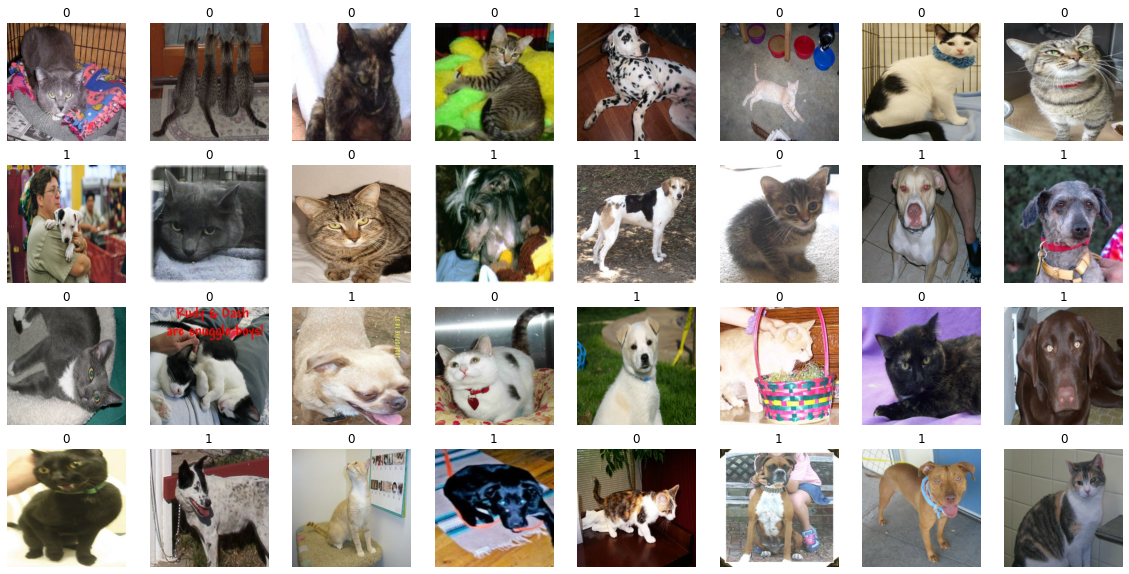

In [ ]:
visualize_images(dataset)

In [ ]:
model = Sequential([
            layers.Conv2D(64, kernel_size=7, activation="relu", input_shape=(256, 256, 3)),
            layers.BatchNormalization(), 
            layers.Conv2D(64, kernel_size=7, activation="relu"),
            layers.BatchNormalization(), 
            layers.MaxPool2D(),
            layers.Dropout(0.3), 
            layers.Conv2D(64, kernel_size=7, activation="relu"), 
            layers.BatchNormalization(), 
            layers.Conv2D(64, kernel_size=7, activation="relu"), 
            layers.BatchNormalization(), 
            layers.MaxPool2D(), 
            layers.Dropout(0.3), 
            layers.Conv2D(128, kernel_size=5, activation="relu"), 
            layers.BatchNormalization(), 
            layers.Conv2D(128, kernel_size=5, activation="relu"), 
            layers.BatchNormalization(), 
            layers.MaxPool2D(), 
            layers.Dropout(0.3), 
            layers.Conv2D(512, kernel_size=3, activation="relu"), 
            layers.BatchNormalization(), 
            layers.Conv2D(512, kernel_size=3, activation="relu"), 
            layers.BatchNormalization(), 
            layers.MaxPool2D(), 
            layers.Dropout(0.3), 
            layers.Conv2D(1024, kernel_size=3, activation="relu"), 
            layers.BatchNormalization(), 
            layers.Conv2D(1024, kernel_size=3, activation="relu"), 
            layers.BatchNormalization(), 
            layers.MaxPool2D(), 
            layers.Flatten(), 
            layers.Dense(2048, activation="relu"), 
            layers.BatchNormalization(), 
            layers.Dropout(0.4), 
            layers.Dense(1024, activation="relu"),
            layers.BatchNormalization(), 
            layers.Dense(512, activation="relu"),
            layers.BatchNormalization(), 
            layers.Dense(128, activation="relu"),
            layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_111 (Conv2D)         (None, 250, 250, 64)      9472      
                                                                 
 batch_normalization_150 (Ba  (None, 250, 250, 64)     256       
 tchNormalization)                                               
                                                                 
 conv2d_112 (Conv2D)         (None, 244, 244, 64)      200768    
                                                                 
 batch_normalization_151 (Ba  (None, 244, 244, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 122, 122, 64)     0         
 g2D)                                                            
                                                     

In [ ]:
train_dataset = dataset.batch(32)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="nadam", 
              metrics=["accuracy"])
model.fit(train_dataset, epochs=5)

Epoch 1/5
     32/Unknown - 56s 2s/step - loss: 0.9653 - accuracy: 0.5322

InvalidArgumentError: ignored

In [ ]:
for s in i:
    print(s)

(array([[[[5.02788007e-01, 3.45994174e-01, 2.98728555e-01],
         [5.49640000e-01, 3.96698833e-01, 3.37461710e-01],
         [5.61128974e-01, 4.09566492e-01, 3.42210472e-01],
         ...,
         [7.56518066e-01, 7.85477936e-01, 7.39928007e-01],
         [7.04855978e-01, 7.39943326e-01, 7.19094694e-01],
         [6.67287052e-01, 6.48644328e-01, 6.32889092e-01]],

        [[5.20557582e-01, 3.70684206e-01, 3.27097446e-01],
         [5.67597032e-01, 4.11289364e-01, 3.62526566e-01],
         [5.81827819e-01, 4.30890024e-01, 3.71266574e-01],
         ...,
         [7.66867459e-01, 7.96452045e-01, 7.50589788e-01],
         [7.28983819e-01, 7.53971577e-01, 7.36489475e-01],
         [6.78198695e-01, 6.31436944e-01, 6.01778388e-01]],

        [[5.38823605e-01, 3.92916799e-01, 3.56328279e-01],
         [5.79381108e-01, 4.22550708e-01, 3.81663591e-01],
         [5.93313873e-01, 4.40876812e-01, 3.92270565e-01],
         ...,
         [7.58593261e-01, 7.82497287e-01, 7.40202308e-01],
         

InvalidArgumentError: ignored